In [1]:
import numpy as np
import matplotlib.pyplot as plt
from queue import Queue
import time
import random
import numba
import json

In [6]:
""" BFS """

' BFS '

Text(0.5, 1.0, 'Maze_1')

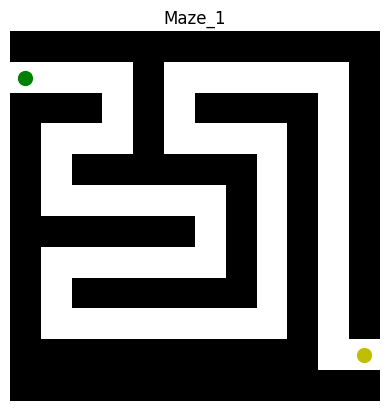

In [7]:
# Create the maze array (1 for walls, 0 for paths)
maze_1 = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1],
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
    [1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])

rows, cols = 12, 12
start = (1, 0)
goal = (10, 11)

plt.imshow(maze_1, cmap = 'binary')

# Mark the start point (green)
start = (1, 0)
plt.plot(start[1], start[0], 'go', markersize=12, markeredgecolor='white')

# Mark the end point (yellow)
end = (10, 11)
plt.plot(end[1], end[0], 'yo', markersize=12, markeredgecolor='white')

plt.axis('off')

plt.title("Maze_1")

Text(0.5, 1.0, 'Maze_2')

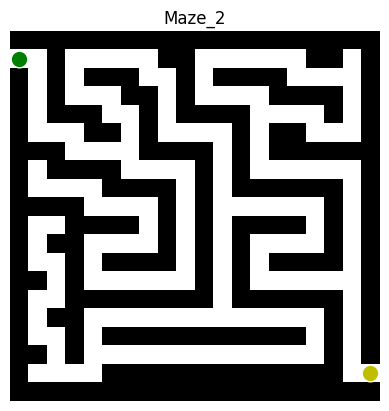

In [8]:
# Create the maze array (1 for walls, 0 for paths)
maze_2 = np.array([
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1],
    [1,0,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,0,0,1],
    [1,0,1,0,0,0,1,1,0,1,0,0,0,0,1,1,1,1,0,1],
    [1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,0,0,1,0,1],
    [1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1],
    [1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,1,1,1,1],
    [1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1],
    [1,0,0,0,0,1,1,1,1,0,1,0,1,1,1,1,1,1,0,1],
    [1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1],
    [1,0,0,1,1,1,1,0,1,0,1,0,1,1,1,1,0,1,0,1],
    [1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1],
    [1,0,0,1,0,1,1,1,1,0,1,0,1,0,1,1,1,1,0,1],
    [1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1],
    [1,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1],
    [1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1],
    [1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1],
    [1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1],
    [1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0],
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
])

rows, cols = 20, 20
start = (1, 0)
end = (18, 19)

plt.imshow(maze_2, cmap = 'binary')

# Mark the start point (green)
start = (1, 0)
plt.plot(start[1], start[0], 'go', markersize=12, markeredgecolor='white')

# Mark the end point (yellow)
end = (18, 19)
plt.plot(end[1], end[0], 'yo', markersize=12, markeredgecolor='white')

plt.axis('off')

plt.title('Maze_2')

Text(0.5, 1.0, 'Maze_3')

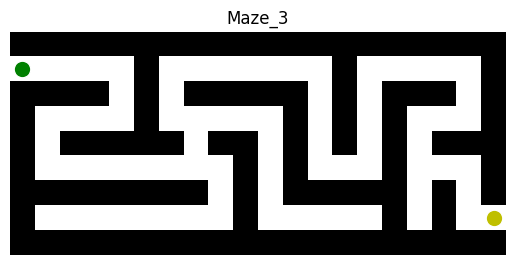

In [9]:
# Create the maze array (1 for walls, 0 for paths)
maze_3 = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])

rows, cols = 9, 20
start = (1, 0)
end = (7, 19)

plt.imshow(maze_3, cmap = 'binary')

# Mark the start point (green)
start = (1, 0)
plt.plot(start[1], start[0], 'go', markersize=12, markeredgecolor='white')

# Mark the end point (yellow)
end = (7, 19)
plt.plot(end[1], end[0], 'yo', markersize=12, markeredgecolor='white')

plt.axis('off')

plt.title('Maze_3')

In [5]:
def bfs(maze, start, goal):
    """
    Perform Breadth-First Search on the maze and return the path and explored nodes.
    
    Parameters:
    maze (numpy.ndarray): 2D array representing the maze
    start (tuple): Starting position (row, col)
    goal (tuple): Goal position (row, col)
    
    Returns:
    list: Path from start to goal
    set: All explored nodes
    int: Number of nodes expanded
    """
    rows, cols = maze.shape
    queue = Queue()
    queue.put(start)
    visited = set([start])
    parent = {}
    nodes_expanded = 0
    explored = set()

    while not queue.empty():
        current = queue.get()
        nodes_expanded += 1
        explored.add(current)

        if current == goal:
            path = []
            while current in parent:
                path.append(current)
                current = parent[current]
            path.append(start)
            return path[::-1], explored, nodes_expanded

        for dr, dc in [(0, 1), (1, 0), (0, -1), (-1, 0)]:  # Right, Down, Left, Up
            nr, nc = current[0] + dr, current[1] + dc
            if 0 <= nr < rows and 0 <= nc < cols and maze[nr, nc] == 0 and (nr, nc) not in visited:
                queue.put((nr, nc))
                visited.add((nr, nc))
                parent[(nr, nc)] = current

    return None, explored, nodes_expanded  # No path found


In [6]:
def visualize_maze(maze, start, goal, path, explored):
    """
    Visualize the maze, path, and explored nodes.
    
    Parameters:
    maze (numpy.ndarray): 2D array representing the maze
    start (tuple): Starting position (row, col)
    goal (tuple): Goal position (row, col)
    path (list): Path from start to goal
    explored (set): Set of explored nodes
    """
    # plt.figure(figsize=(10, 10))
    plt.imshow(maze, cmap='binary')
    
    # Plot explored nodes
    explored_r, explored_c = zip(*explored)
    plt.scatter(explored_c, explored_r, color='lightblue', alpha=0.3, s=50)
    
    # Plot path
    if path:
        path_r, path_c = zip(*path)
        plt.plot(path_c, path_r, color='red', linewidth=2, marker='o', markersize=6)
    
    # Mark start and goal
    plt.plot(start[1], start[0], 'go', markersize=12, label='Start')
    plt.plot(goal[1], goal[0], 'yo', markersize=12, label='Goal')

    plt.legend()
    plt.title('Maze Solution with BFS')
    plt.axis('off')
    plt.show()

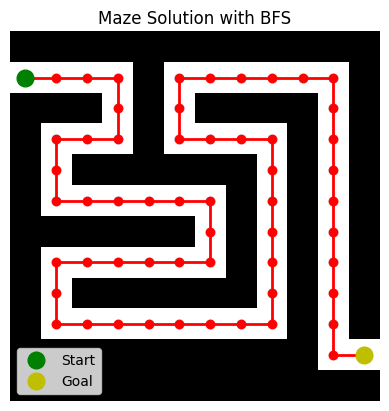

BFS: Time = 0.0000s, Nodes Expanded = 57, Path Length = 57


In [17]:
rows, cols = 12, 12
start = (1, 0)
goal = (10, 11)
maze = maze_1

# Run BFS
start_time = time.time()
bfs_path, bfs_explored, bfs_nodes_expanded = bfs(maze, start, goal)
bfs_time = time.time() - start_time

# Visualize the result
visualize_maze(maze, start, goal, bfs_path, bfs_explored)
print(f"BFS: Time = {bfs_time:.4f}s, Nodes Expanded = {bfs_nodes_expanded}, Path Length = {len(bfs_path) if bfs_path else 'N/A'}")

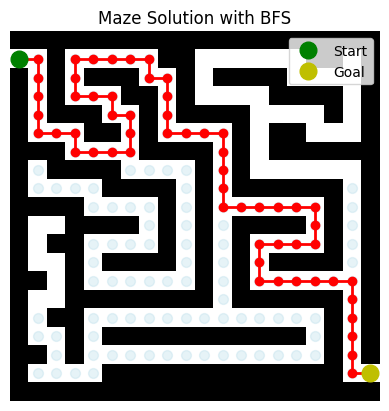

BFS: Time = 0.0010s, Nodes Expanded = 135, Path Length = 59


In [13]:
rows, cols = 20, 20
start = (1, 0)
goal = (18, 19)
maze = maze_2

# Run BFS
start_time = time.time()
bfs_path, bfs_explored, bfs_nodes_expanded = bfs(maze, start, goal)
bfs_time = time.time() - start_time

# Visualize the result
visualize_maze(maze, start, goal, bfs_path, bfs_explored)

print(f"BFS: Time = {bfs_time:.4f}s, Nodes Expanded = {bfs_nodes_expanded}, Path Length = {len(bfs_path) if bfs_path else 'N/A'}")

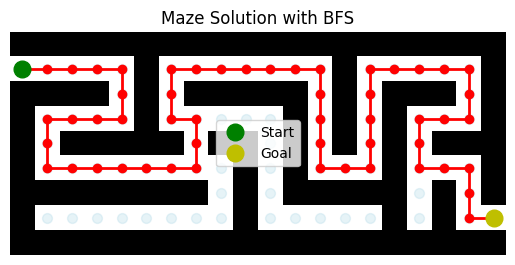

BFS: Time = 0.0010s, Nodes Expanded = 77, Path Length = 54


In [14]:
rows, cols = 9, 20
start = (1, 0)
goal = (7, 19)
maze = maze_3

# Run BFS
start_time = time.time()
bfs_path, bfs_explored, bfs_nodes_expanded = bfs(maze, start, goal)
bfs_time = time.time() - start_time

# Visualize the result
visualize_maze(maze, start, goal, bfs_path, bfs_explored)

print(f"BFS: Time = {bfs_time:.4f}s, Nodes Expanded = {bfs_nodes_expanded}, Path Length = {len(bfs_path) if bfs_path else 'N/A'}")